# Aula 2: Limites e Derivadas (Regressão Logística)

## Introdução

Nesta aula, desvendaremos a "mágica" por trás da Regressão Logística, um dos algoritmos de classificação mais fundamentais. Em vez de tratá-la como uma caixa-preta, entenderemos como o cálculo (especificamente, derivadas e limites) é o motor que a faz funcionar.


## A teoria por trás do aprendizado

### O problema de classificação

A Regressão Logística é usada para problemas de classificação binária, como prever se um e-mail é spam ou não, se um cliente irá comprar um produto, ou se um tumor é maligno.

Diferente da Regressão Linear, que prevê um valor contínuo (ex: preço de uma casa), a Regressão Logística prevê uma probabilidade de que um dado pertença a uma certa classe (0 ou 1).

A grande pergunta é: Como o modelo encontra a melhor "linha de separação" para classificar os dados? A resposta está no cálculo!


## Revisão super rápida de Limites e Derivadas

*Limites*: Pense em um limite como o valor que uma função se aproxima à medida que a entrada se aproxima de um certo ponto. Na Regressão Logística, usamos limites para entender o comportamento da função de ativação.

*Derivadas*: A derivada é a taxa de variação instantânea de uma função. No nosso contexto, ela nos diz a "inclinação" da nossa função de custo.

Se a derivada é positiva, o custo está subindo.

Se a derivada é negativa, o custo está descendo.

A derivada é a nossa bússola! Ela nos diz em qual direção devemos ajustar os parâmetros do modelo para diminuir o erro.


### Limites
- Comportamento da função sigmoide: $ h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} $ tende a 0 ou 1.
- Limite em pontos críticos (ex.: $ x \to \infty $).

### Derivadas
- Derivada da sigmoide: $ h_\theta'(x) = h_\theta(x) (1 - h_\theta(x)) $.
- Função de custo: $ J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $.
- Gradiente: $ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $.

Se a derivada é zero, estamos no ponto de mínimo (ou máximo) do custo.


## Componentes da regressão Logística

**A Função Sigmoide** : Para converter a saída linear do modelo em uma probabilidade entre 0 e 1, usamos a função sigmoide.

A equação é:
![image.png](attachment:image.png)

Onde z é a combinação linear das características e seus pesos: z = w_0 + w_1x_1 + w_2x_2+...
A função **sigmoid** "achata" a saida, garantindo que o resultado esteja sempre entre 0 e 1.

Onde z é a "pontuação" que o modelo de regressão logística calculou (soma dos pesos multiplicado pelas caracteristicas).
"e" é uma constante matemática, base do logaritmo natural.
e^-z é o "e" elevado a potencia de -z.
    
    - Se z for um numero grande e positivo se tornará um numero pequeno ex.: e^-5 = 0.0067
    - Se z for um numero grande e negativo se tornará um numero grande ex.: e^5 = 148.4

E o passo final é o calculo da probabilidade final:
    - 1 / (1+ e^-z) essa relação garante um valor de saida entre 0 e 1.
    
    - Ex 1 (z = -5).: 1 / (1 + e^-5) = 1 / (1 + 0.0067) = 1 / 1.0067 = 0.993  (Probabilidade alta)
    - Ex 2 (z = 5).: 1 / (1 + e^5) = 1 / (1 + 148.4) = 1 / 149.4 = 0.0067     (Probabilidade baixa)
    - Ex 3 (z = 0).: 1 / (1 + e^0) = 1 / (1 + 1) = 1 / 2 = 0.5                (Probabilidade média 50%)


Imagine a função sigmoide como uma espécie de "porta" ou "tradutor" mágica.

Recebe qualquer número que você der a ela (positivo, negativo, grande, pequeno...) e transforma esse número em um valor que está sempre entre 0 e 1.

Não importa se você dá o número 1000 ou -50, a sigmoide sempre irá "espremer" esse valor para um número que pode ser interpretado como uma probabilidade.

Analogia do Elevador de Probabilidade
Pense em um elevador em um prédio.

O andar de baixo do prédio é o 0 (0% de probabilidade).

O andar de cima do prédio é o 1 (100% de probabilidade).

A função sigmoide é como o botão do elevador. Você pode apertar qualquer andar (qualquer número), mas o elevador só vai te levar para algum lugar entre o andar 0 e o andar 1.

Se o número que você dá é muito grande e positivo, a sigmoide leva você para o andar 1 (probabilidade de 100%).

Se o número que você dá é muito grande e negativo, a sigmoide leva você para o andar 0 (probabilidade de 0%).

Se o número é zero, ela te leva exatamente para o meio, o andar 0.5 (probabilidade de 50%).

Por que isso é tão importante na Regressão Logística?
Na Regressão Logística, o modelo primeiro faz um cálculo simples para cada pessoa (ou item), como este:

Resultado = (Peso1 * Característica1) + (Peso2 * Característica2) + ...

Esse Resultado pode ser qualquer número, tipo 5, -10, ou 0.25.

Mas nós não queremos um número qualquer! Queremos saber a probabilidade de, por exemplo, um cliente sair da empresa (churn). É aí que a sigmoide entra:

Probabilidade de Churn = sigmoid(Resultado)

A sigmoide pega esse Resultado e o converte em uma probabilidade real, por exemplo, 0.85 (85% de chance de churn).



**A função de custo (Log Loss)** : Precisamos de uma função para medir o quão ruim é a previsão do nosso modelo. O Erro Quadrático Médio (MSE) funciona mal para a classificação (não é convexa), então usamos a Entropia Cruzada ou Log Loss.

A equação para um único exemplo é:

![image-2.png](attachment:image-2.png)

Onde y é o valor real (0 ou 1) e
haty é a probabilidade prevista pelo modelo.

Por que essa função? Ela penaliza muito mais uma previsão errada e confiante. Se a resposta é 1, mas o modelo prevê 0, ele receberá um custo muito alto. Se a resposta é 1 e ele prevê 0.99, o custo será quase zero.


### O coração do aprendizado: O Gradiente Descendente

O Gradiente Descendente é um algoritmo de otimização que usa a derivada para encontrar o ponto de mínimo da função de custo. A ideia é simples: Começamos com pesos aleatórios.
Calculamos o "declive" (derivada) da função de custo para nossos pesos atuais.
Movemos os pesos na direção oposta ao declive para descer o vale do custo.
Repetimos o processo até chegarmos ao fundo.
A regra de atualização dos pesos (w) é:

![image-3.png](attachment:image-3.png)

- $ \frac{\partial J}{\partial w_j} $: É a derivada da função de custo em relação ao peso w_j.

- alpha (alfa): É a taxa de aprendizado, que controla o tamanho de cada passo que damos.






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
# Gerar dados ficticios
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1, class_sep=2)

In [ ]:
# Adiciona coluna de intercepto
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [ ]:
# Dividir os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [ ]:
## Normalizar os dados para o Gradiente descendente
## X - Media de X / Desvio padrão de X

X_train[:, 1:] = (X_train[:, 1:] - np.mean(X_train[:, 1:], axis=0)) / np.std(X_train[:, 1:], axis=0)
X_test[:, 1:] = (X_test[:, 1:] - np.mean(X_test[:, 1:], axis=0)) / np.std(X_test[:, 1:], axis=0)

In [ ]:
# Funções do modelo e do algoritmo de treinamento

def sigmoid(z):
    '''
    Função de ativação sigmoid
    Converte em valor real em uma probabilidade entre 0 e 1.
    '''
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, alpha, iteractions):
    '''
    Algoritmo de Gradiente descendente para regressão logistica
    Encontra os melhores pesos (theta) para minimizar a função de custo.
    '''
    m = len(y)
    theta = np.zeros(X.shape[1]) # Iniciando os pesos
    costs = [] # Lista para armazenar o custo, vazia

    for i in range(iteractions):
        # Passo 1. Calcular a hipotese (saida do modelo)
        z = np.dot(X, theta) # Dados * pesos
        h = sigmoid(z) # Aplica função sigmoide

        # Passo 2. Calcular o erro (diferença entre previsão e valor real)
        error = h - y

        # Passo 3. Calcular o gradiente (derivada da função de custo)
        gradient = np.dot(X.T, error) / m

        # Passo 4. Atualizar os pesos (dar um passo na direção oposta ao gradiente)
        theta = theta - alpha * gradient

        # Passo 5. Calcular o custo e armazenar para visualização
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        costs.append(cost)

    return theta, costs


In [ ]:
# Treinamento do modelo

alpha = 0.1 # Taxa de aprendizado
iteractions = 1000 # Número de iterações

theta, costs = gradient_descent(X_train, y_train, alpha, iteractions)
print(f"Pesos (theta) e final custo: {theta}, {costs[-1]}")

Pesos (theta) e final custo: [ 0.19409964 -0.05503997  4.78822253], 0.05479481505032156


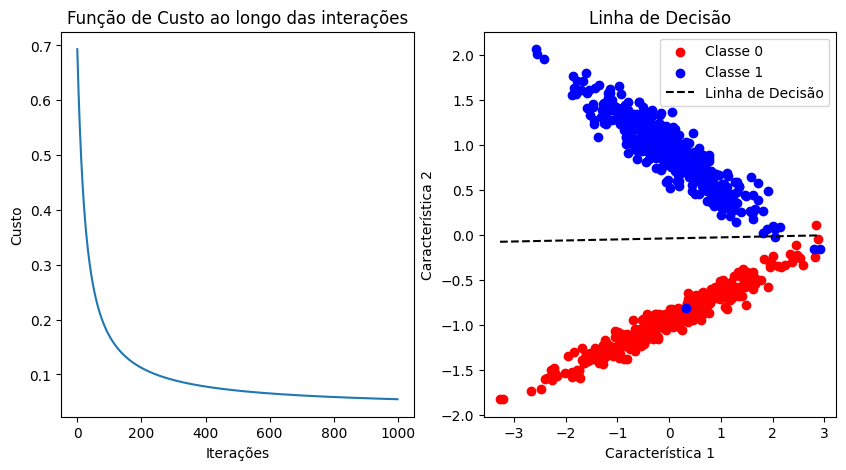

In [ ]:
## Graficos para visualizar o resultado do treinamento

plt.figure(figsize=(10, 5)) # Quadro

# plot 1: Grafico de função de custo
plt.subplot(1, 2, 1) # 1 linha, 2 colunas e estamos no indice 1
plt.plot(costs)
plt.title('Função de Custo ao longo das interações')
plt.xlabel('Iterações')
plt.ylabel('Custo')

# Plot 2: Grafico de linha de decisão
plt.subplot(1, 2, 2) # 1 linha, 2 colunas e estamos no indice 2
plt.scatter(X_train[y_train == 0, 1], X_train[y_train == 0, 2], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1, 1], X_train[y_train == 1, 2], color='blue', label='Classe 1')

# Plotar a linha de decisão (onde a probabilidade for 0.5, ou seja, theta * X = 0)
x_vals = np.array([np.min(X_train[:, 1]), np.max(X_train[:, 1])])
y_vals = -(theta[0] + np.dot(theta[1], x_vals)) / theta[2]
plt.plot(x_vals, y_vals, '--', color='black', label='Linha de Decisão')

plt.title('Linha de Decisão')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [ ]:
## Fazer previsões com modelo
def predict(X, theta):
    z = np.dot(X, theta)
    return (sigmoid(z) >= 0.5).astype(int)

In [ ]:
y_pred = predict(X_test, theta) # Chama a função predict e aplica os dados de teste com pesos
accuracy = np.mean(y_pred == y_test) # Calcula a acurácia
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 0.9950


#### **Aplicação em Dataset Churn**


# **Sobre os dados**

Este conjunto de dados é sobre a evasão de clientes de uma empresa de telefonia. Abaixo temos o dicionário de dados.

state - Código de 2 letras do estado americado de residencia do cliente

account length - numero de meses que o cliente está com o provedor de telecomunicações

area code - codigo de área

international plan - Se cliente possui plano internacional sim ou não

voice mail plan - Se o cliente tem plano de correio de voz sim ou não

number vmail messages - Numero de mensagem de correio de voz

total day minutes - total de minutos das chamadas diarias

total day calls - numeros total de chamadas diarias

total day charge - cobrança total das chamadas por dia

total eve minutes - total de minutos de chamadas noturnas

total eve calls - total de chamadas noturnas

total eve charge - cobrança total das chamadas noturna

total night minutes - total de minutos de chamadas noturnas

total night calls - Numero total de chamadas noturnas

total night charge - cobrança total das chamadas noturnas

total intl minutes - total de minutos para chamadas
internacionais

total intl calls - total de chamadas internacionais

total intl charge - cobrança total de chamadas internacionais

number customer service calls - numero de ligações para atendimento ao cliente

Churn - Evasão de clientes, sim ou não


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('churn_train.csv')
df.sample(5) # Retorna amostra aleatoria do conjunto de dados, neste caso 5 registros

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
770,RI,65,area_code_415,no,no,0,111.0,51,18.87,219.8,84,18.68,202.0,89,9.09,4.4,14,1.19,1,no
1180,HI,105,area_code_510,no,no,0,227.4,121,38.66,268.5,89,22.82,143.3,82,6.45,13.0,4,3.51,1,no
1013,NE,154,area_code_415,no,no,0,191.4,93,32.54,205.4,119,17.46,205.7,121,9.26,10.2,3,2.75,3,no
893,KS,117,area_code_510,no,yes,25,216.0,140,36.72,224.1,69,19.05,267.9,112,12.06,11.8,4,3.19,0,no
1688,IN,86,area_code_510,no,no,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0,no


In [ ]:
# Transformação de variáveis
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

In [ ]:
df['churn'].value_counts() / len(df) * 100

,count
churn,
0,85.929412
1,14.070588


In [ ]:
X = df.drop(['churn', 'state', 'area_code'], axis=1)  # axis=0 linha, axis=1 coluna
y = df['churn'] # deixo somente a variável algo.

In [ ]:
# Divisão entre treino e teste com 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Adicionar coluna de viés (intercepto)
X_train_b = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_b = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

In [ ]:
print(f"\n Formato final dos dados de treino (com viés): {X_train_b.shape}")


 Formato final dos dados de treino (com viés): (3400, 18)


In [ ]:
# Funções do modelo e do algoritmo de treinamento

def sigmoid(z):
    '''
    Função de ativação sigmoid
    Converte em valor real em uma probabilidade entre 0 e 1.
    '''
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, alpha, iteractions):
    '''
    Algoritmo de Gradiente descendente para regressão logistica
    Encontra os melhores pesos (theta) para minimizar a função de custo.
    '''
    m = len(y)
    theta = np.zeros(X.shape[1]) # Iniciando os pesos
    costs = [] # Lista para armazenar o custo, vazia

    for i in range(iteractions):
        # Passo 1. Calcular a hipotese (saida do modelo)
        z = np.dot(X, theta) # Dados * pesos
        h = sigmoid(z) # Aplica função sigmoide

        # Passo 2. Calcular o erro (diferença entre previsão e valor real)
        error = h - y

        # Passo 3. Calcular o gradiente (derivada da função de custo)
        gradient = np.dot(X.T, error) / m

        # Passo 4. Atualizar os pesos (dar um passo na direção oposta ao gradiente)
        theta = theta - alpha * gradient

        # Passo 5. Calcular o custo e armazenar para visualização
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        costs.append(cost)

    return theta, costs

## Fazer previsões com modelo
def predict(X, theta):
    z = np.dot(X, theta)
    return (sigmoid(z) >= 0.5).astype(int)

In [ ]:
# Treinamento e avaliação
alpha = 0.1
iteractions = 1000

In [ ]:
print("\nIniciando o treinamento do modelo, aguarde...")
theta_final, cost = gradient_descent(X_train_b, y_train, alpha, iteractions)
print("Treinamento finalizado!")
print(f"Pesos (theta) e final custo: {theta_final}, {cost[-1]}")


Iniciando o treinamento do modelo, aguarde...
Treinamento finalizado!
Pesos (theta) e final custo: [-2.39474504  0.05645392  0.58511827 -0.39809011 -0.09599836  0.37745295
  0.03452818  0.37728715  0.15747281 -0.02297137  0.15783242  0.10223836
 -0.0311664   0.10193839  0.10461468 -0.14542781  0.10401556  0.69517243], 0.31112639483841775


In [ ]:
# Fazer previsões no conjunto de teste e calcular acurária
y_pred = predict(X_test_b, theta_final)
accuracy = np.mean(y_pred == y_test)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 0.8612
